## Polytope Climate-DT Bounding Box example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [2]:
%%capture cap
%run ../desp-authentication.py

Exception: Invalid username or password.

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [4]:
import earthkit.data
import earthkit.plots
from polytope.api import Client

In [5]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        "type": "boundingbox",
        "points" : [[53.55, 2.76], [50.66, 7.86]],
    },
}

files = client.retrieve("destination-earth", request, "data/climate-dt-earthkit-fe-boundingbox.grib") 

2025-07-20 14:17:31 - INFO - Key read from /Users/maes/.polytopeapirc
2025-07-20 14:17:31 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20210101'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  points:\n'
            '  - - 53.55\n'
            '    - 2.76\n'
            '  - - 50.66\n'
            '    - 7.86\n'
            '  type: boundingbox\n'
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: ifs-nemo\n'
            'param: 167/165\n'
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-07-20 14:17:31 - INFO - Polytope user key found in session cache for user maes


2025-07-20 14:17:31 - INFO - Request accepted. Please poll ./dab2184a-09d7-4b61-9f9e-cc29a2af808a for status
2025-07-20 14:17:31 - INFO - Polytope user key found in session cache for user maes
2025-07-20 14:17:31 - INFO - Checking request status (dab2184a-09d7-4b61-9f9e-cc29a2af808a)...
2025-07-20 14:17:32 - INFO - The current status of the request is 'queued'
2025-07-20 14:17:33 - INFO - The current status of the request is 'processing'
2025-07-20 14:17:36 - INFO - The current status of the request is 'processed'
2025-07-20 14:17:36 - INFO - Starting data download (application/prs.coverage+json)...
2025-07-20 14:17:36 - INFO - Saving data into /Users/maes/Documents/polytope-examples/climate-dt/data/climate-dt-earthkit-fe-boundingbox.grib...
2025-07-20 14:17:36 - INFO - Data downloaded successfully
2025-07-20 14:17:36 - INFO - Download rate 10.5MiB/s
2025-07-20 14:17:36 - INFO - Data saved successfully into /Users/maes/Documents/polytope-examples/climate-dt/data/climate-dt-earthkit-fe-

In [6]:
data = earthkit.data.from_source("file", "data/climate-dt-earthkit-fe-boundingbox.grib") 

In [7]:
data._json()

{'type': 'CoverageCollection',
 'domainType': 'MultiPoint',
 'coverages': [{'mars:metadata': {'activity': 'scenariomip',
    'class': 'd1',
    'dataset': 'climate-dt',
    'Forecast date': '2021-01-01T00:00:00Z',
    'experiment': 'ssp3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'ifs-nemo',
    'realization': '1',
    'resolution': 'high',
    'stream': 'clte',
    'type': 'fc',
    'number': 0,
    'step': 0},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'t': {'values': ['2021-01-01T00:00:00Z']},
     'composite': {'dataType': 'tuple',
      'coordinates': ['latitude', 'longitude', 'levelist'],
      'values': [[50.674160307446, 7.837677725118, 0],
       [50.674160307446, 7.731042654028, 0],
       [50.674160307446, 7.197867298578, 0],
       [50.674160307446, 7.091232227488, 0],
       [50.674160307446, 6.984597156398, 0],
       [50.674160307446, 6.877962085308, 0],
       [50.674160307446, 7.624407582938, 0],
     

In [8]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 133kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 2770)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2021-01-01T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 22kB 0 1 2 3 4 5 ... 2764 2765 2766 2767 2768 2769
    latitude   (points) float64 22kB 50.67 50.67 50.67 ... 53.52 53.52 53.52
    longitude  (points) float64 22kB 7.838 7.731 7.198 ... 3.038 3.153 2.924
    levelist   (points) float64 22kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 22kB 3.132 ... 7.613
    2t         (datetimes, number, steps, points) float64 22kB 275.8 ... 278.7
Attributes: (12/16)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    Forecast date:  2021-01-01T00:00:00Z
    experiment:     ssp3-7.0
    expver:         0001
    ...             ...
    resolution:     high
    stream:         clte
    type:           fc
    number:         0
    step:           0
    date:           2021-01-01T00:00:00Z

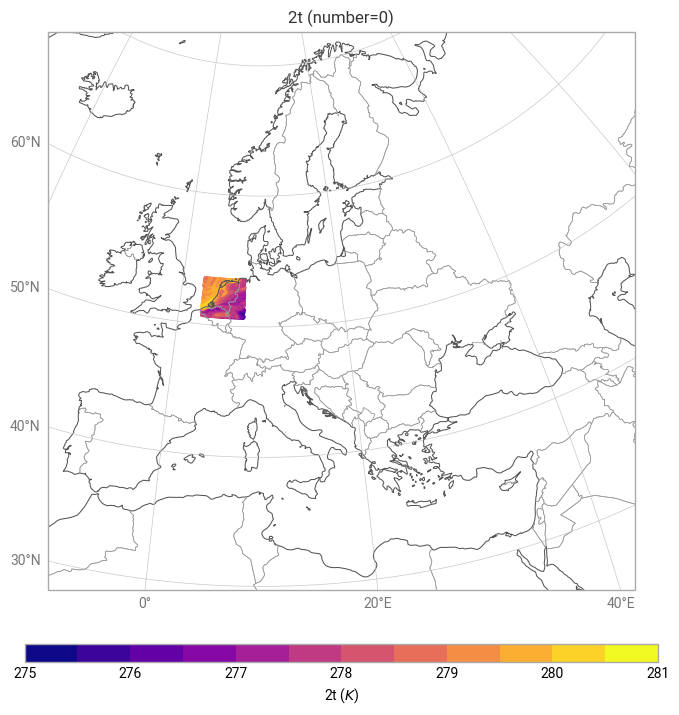

In [9]:
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(ds['2t'], x="longitude", y="latitude")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()